In [2]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

train = pd.read_csv('./data/finger_maccs_fp_train.csv')
train.drop(columns=['id','Unnamed: 0','SMILES'],inplace=True)
train = train.rename(columns = {'Num_H_Acceptors': 'Acceptors','Num_H_Donors': 'Donors','Num_RotatableBonds':'RotatableBonds'})

test = pd.read_csv('./data/finger_maccs_fp_test.csv')
test.drop(columns=['id','Unnamed: 0','SMILES'],inplace=True)
test = test.rename(columns = {'Num_H_Acceptors': 'Acceptors','Num_H_Donors': 'Donors','Num_RotatableBonds':'RotatableBonds'})
preds = np.array([])


MLM

In [2]:
preds = np.array([])

x_df = train.drop(columns=["HLM",'MLM'])
y_df = train['MLM']
kf = KFold(n_splits=6)
i=0

for train_index, valid_index in kf.split(x_df,y_df):
    x_train, x_test =  x_df.iloc[train_index], x_df.iloc[valid_index]
    y_train, y_test =  y_df.iloc[train_index], y_df.iloc[valid_index]
    
    dtrain = xgb.DMatrix(x_train, label=y_train)
    dtest = xgb.DMatrix(x_test, label=y_test)
    
    pred_df = pd.DataFrame() 
    
    
    params={'reg_lambda': 3.970598535915323, 'gamma': 9.254009054984513, 'reg_alpha': 8.180688938901085, 'colsample_bytree': 0.7, 'subsample': 0.7, 'max_depth': 3, 'min_child_weight': 158}
    model = xgb.train(params,dtrain,evals=[(dtest, 'test')])
    
    
    y_pred = model.predict(dtest)
    pred_df.loc[:,i] = y_pred
    i += 1
pred = pred_df.mean(axis=1)   


[0]	test-rmse:43.00663
[1]	test-rmse:37.83240
[2]	test-rmse:34.72812
[3]	test-rmse:33.18480
[4]	test-rmse:32.42051
[5]	test-rmse:31.95147
[6]	test-rmse:31.60158
[7]	test-rmse:31.50448
[8]	test-rmse:31.49764
[9]	test-rmse:31.42857
[0]	test-rmse:40.53858
[1]	test-rmse:35.83975
[2]	test-rmse:33.23911
[3]	test-rmse:31.94757
[4]	test-rmse:31.38115
[5]	test-rmse:31.08167
[6]	test-rmse:30.96983
[7]	test-rmse:30.94513
[8]	test-rmse:30.92645
[9]	test-rmse:30.90548
[0]	test-rmse:44.35750
[1]	test-rmse:39.36692
[2]	test-rmse:36.51070
[3]	test-rmse:35.09227
[4]	test-rmse:34.11339
[5]	test-rmse:33.53669
[6]	test-rmse:33.11909
[7]	test-rmse:32.91445
[8]	test-rmse:32.70572
[9]	test-rmse:32.61546
[0]	test-rmse:42.73063
[1]	test-rmse:37.79712
[2]	test-rmse:35.26252
[3]	test-rmse:33.77420
[4]	test-rmse:32.86827
[5]	test-rmse:32.34374
[6]	test-rmse:32.07945
[7]	test-rmse:32.06054
[8]	test-rmse:31.92924
[9]	test-rmse:31.92760
[0]	test-rmse:44.80662
[1]	test-rmse:40.02634
[2]	test-rmse:36.82004
[3]	test-rm

#노튜닝
RMSE: 31.886022512928907

#튜닝ecfp
RMSE: 31.338393022479174

#튜닝Pharmacophore_fp
RMSE: 31.338393022479174

#finger_maccs_fp_train
RMSE: 31.357495438239596

In [3]:
#튜닝
mlm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", mlm_rmse)


RMSE: 31.357495438239596


HLM

In [4]:
preds = np.array([])

x_df = train.drop(columns=["HLM",'MLM'])
y_df = train['HLM']
kf = KFold(n_splits=6)
i = 0
for train_index, valid_index in kf.split(x_df,y_df):
    
    x_train, x_test =  x_df.iloc[train_index], x_df.iloc[valid_index]
    y_train, y_test =  y_df.iloc[train_index], y_df.iloc[valid_index]
    
    dtrain = xgb.DMatrix(x_train, label=y_train)
    dtest = xgb.DMatrix(x_test, label=y_test)
    
    pred_df = pd.DataFrame() 
    
    
    params={'reg_lambda': 7.907577397615725, 'gamma': 9.61658605798799, 'reg_alpha': 9.441643680941189, 'colsample_bytree': 1.0, 'subsample': 0.8, 'max_depth': 3, 'min_child_weight': 36}
    model = xgb.train(params,dtrain,evals=[(dtest, 'test')])
    
    
    y_pred = model.predict(dtest)
    pred_df.loc[:,i] = y_pred
    i += 1
    
pred = pred_df.mean(axis=1)   


[0]	test-rmse:49.11318


[1]	test-rmse:41.04336
[2]	test-rmse:36.42599
[3]	test-rmse:33.96944
[4]	test-rmse:32.74685
[5]	test-rmse:32.20862
[6]	test-rmse:31.80390
[7]	test-rmse:31.71716
[8]	test-rmse:31.67564
[9]	test-rmse:31.61818
[0]	test-rmse:50.18799
[1]	test-rmse:42.15039
[2]	test-rmse:37.42994
[3]	test-rmse:34.92403
[4]	test-rmse:33.70947
[5]	test-rmse:33.17221
[6]	test-rmse:32.72083
[7]	test-rmse:32.54617
[8]	test-rmse:32.39581
[9]	test-rmse:32.38154
[0]	test-rmse:52.52886
[1]	test-rmse:44.55387
[2]	test-rmse:39.41569
[3]	test-rmse:36.59500
[4]	test-rmse:34.85124
[5]	test-rmse:33.85179
[6]	test-rmse:33.11143
[7]	test-rmse:32.76402
[8]	test-rmse:32.61891
[9]	test-rmse:32.51093
[0]	test-rmse:49.31868
[1]	test-rmse:41.32564
[2]	test-rmse:36.79585
[3]	test-rmse:34.32742
[4]	test-rmse:33.09163
[5]	test-rmse:32.42491
[6]	test-rmse:32.08522
[7]	test-rmse:31.84520
[8]	test-rmse:31.81202
[9]	test-rmse:31.79306
[0]	test-rmse:52.57988
[1]	test-rmse:44.57083
[2]	test-rmse:39.61788
[3]	test-rmse:36.87932
[4]	test-rm

#튜닝
RMSE: 31.70542146735097

#노튜닝
RMSE: 32.14898341371406

#튜닝Pharmacophore_fp
RMSE: 32.23220378965219

#finger_maccs_fp_train
RMSE: 31.447392181040282

In [5]:
#튜닝
hlm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", hlm_rmse)

RMSE: 31.447392181040282


제출

In [3]:
mlm_preds = np.array([])

x_train = train.drop(columns=["HLM",'MLM'])
y_train = train['MLM']

x_test = test

for i in range(6):
    
    pred_df = pd.DataFrame() 
    params={'reg_lambda': 3.970598535915323, 'gamma': 9.254009054984513, 'reg_alpha': 8.180688938901085, 'colsample_bytree': 0.7, 'subsample': 0.7, 'max_depth': 3, 'min_child_weight': 158}
    mlm_model = xgb.XGBRegressor(**params,seed=i,tree_method= "hist", gpu_id=0,)
    mlm_model.fit(x_train,y_train)
    
    y_pred = mlm_model.predict(test)
    
    pred_df.loc[:,i] = y_pred
    i += 1
pred = pred_df.mean(axis=1)   
mlm_preds = np.append(preds, pred)


hlm_preds = np.array([])
x_train = train.drop(columns=["HLM",'MLM'])
y_train = train['HLM']

x_test = test

for i in range(6):
    
    pred_df = pd.DataFrame() 
    params={'reg_lambda': 7.907577397615725, 'gamma': 9.61658605798799, 'reg_alpha': 9.441643680941189, 'colsample_bytree': 1.0, 'subsample': 0.8, 'max_depth': 3, 'min_child_weight': 36}
    hlm_model = xgb.XGBRegressor(**params,seed=i,tree_method= "hist", gpu_id=0)
    hlm_model.fit(x_train,y_train)
    
    y_pred = hlm_model.predict(test)
    
    pred_df.loc[:,i] = y_pred
    i += 1
pred = pred_df.mean(axis=1)   
hlm_preds = np.append(preds, pred)



[14:07:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:339: No visible GPU is found, setting `gpu_id` to -1
[14:07:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:339: No visible GPU is found, setting `gpu_id` to -1
[14:07:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:339: No visible GPU is found, setting `gpu_id` to -1
[14:07:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:339: No visible GPU is found, setting `gpu_id` to -1
[14:07:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:339: No visible GPU is found, setting 

In [5]:
def get_model_complexity(model):
    trees = model.get_booster().get_dump()
    depths = [tree.count('\n') for tree in trees]  # 각 트리의 깊이 계산
    avg_depth = sum(depths) / len(depths)
    return avg_depth


11.42
13.2


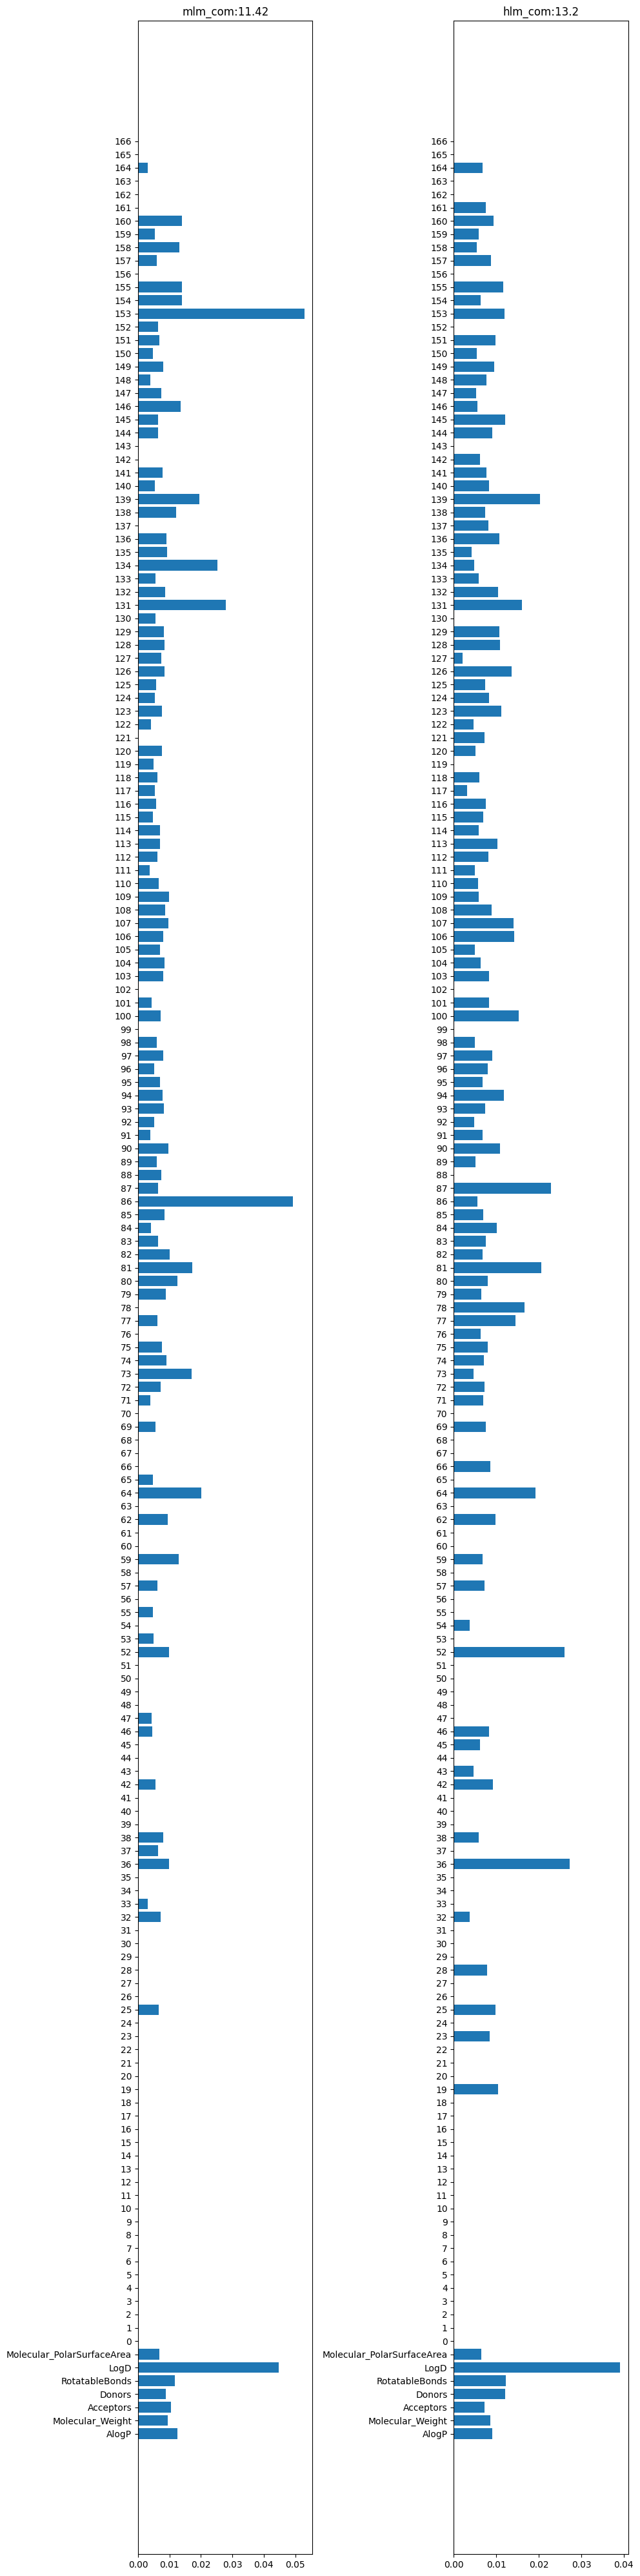

In [11]:
#튜닝
mlm_complexity = get_model_complexity(mlm_model)
print(mlm_complexity)
hlm_complexity = get_model_complexity(hlm_model)
print(hlm_complexity)

fig = plt.figure(figsize = (10, 40))
ax = plt.subplot(1, 2, 1)
plt.title(f"mlm_com:{mlm_complexity}")
plt.barh(x_test.columns,mlm_model.feature_importances_)
ax = plt.subplot(1, 2, 2)
plt.title(f"hlm_com:{hlm_complexity}")
plt.barh(x_test.columns,hlm_model.feature_importances_)
plt.tight_layout()
plt.show()

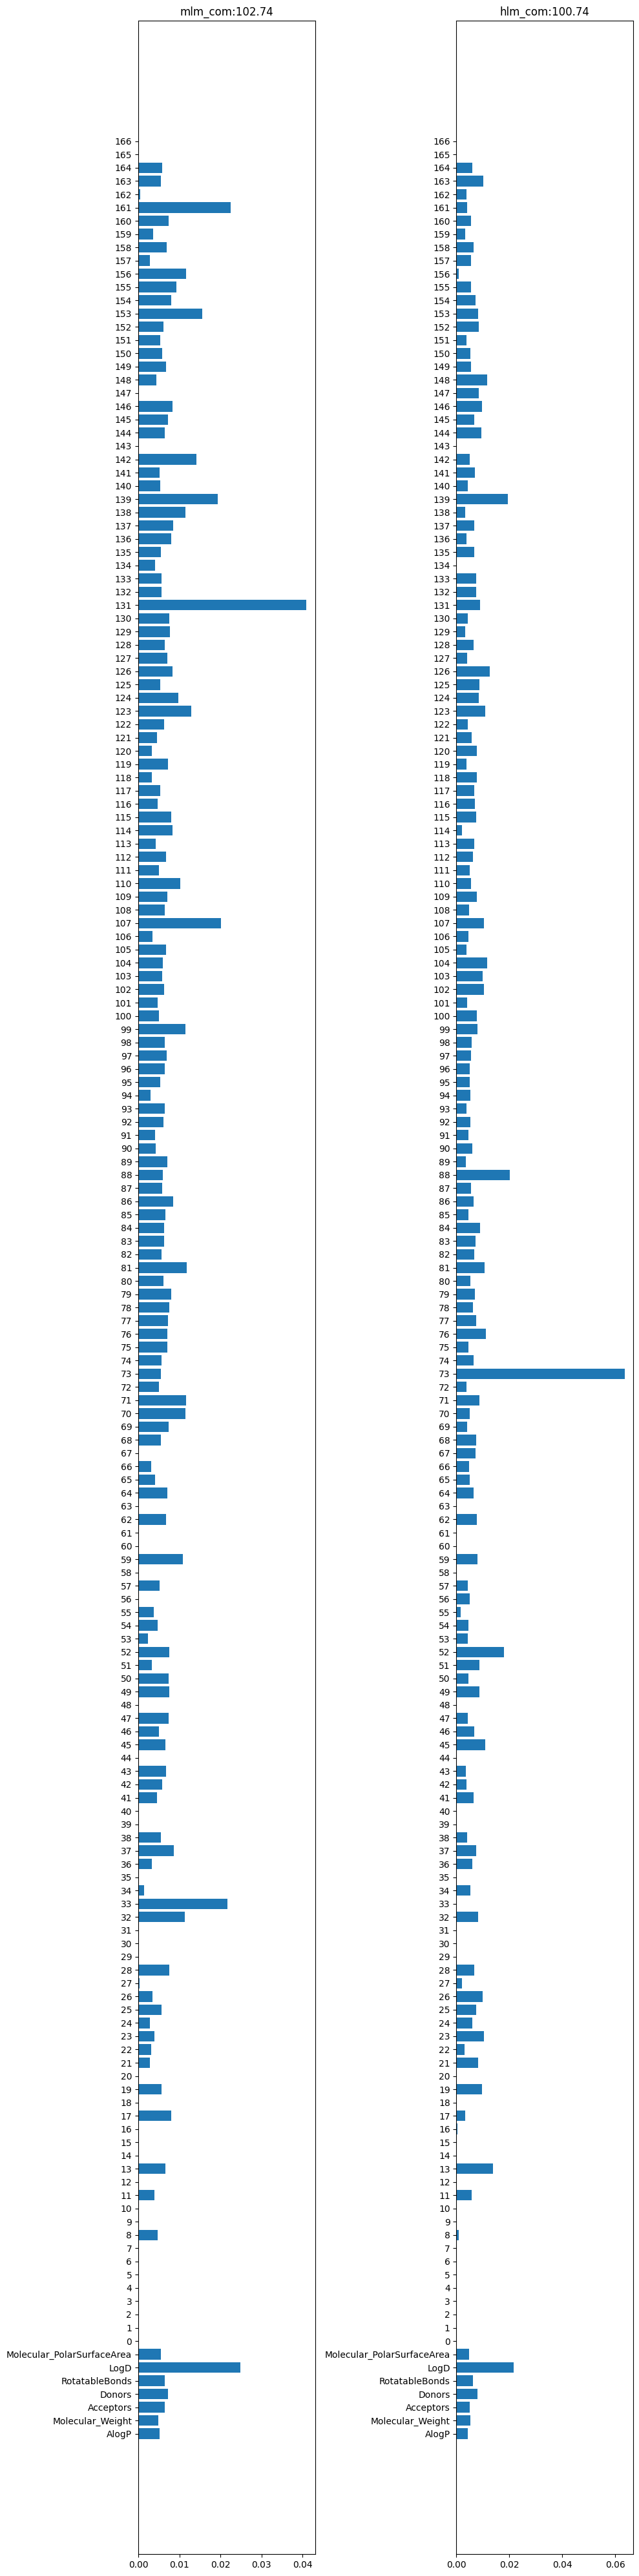

In [6]:
#노튜닝
mlm_complexity = get_model_complexity(mlm_model)
hlm_complexity = get_model_complexity(hlm_model)

fig = plt.figure(figsize = (10, 40))
ax = plt.subplot(1, 2, 1)
plt.title(f"mlm_com:{mlm_complexity}")
plt.barh(x_test.columns,mlm_model.feature_importances_)
ax = plt.subplot(1, 2, 2)
plt.title(f"hlm_com:{hlm_complexity}")
plt.barh(x_test.columns,hlm_model.feature_importances_)
plt.tight_layout()
plt.show()

In [7]:
submission = pd.read_csv('./origin_data/sample_submission.csv')
submission['MLM'] = mlm_preds
submission['HLM'] = hlm_preds
submission.to_csv('./submission/xgb_finger_maccs.csv',index=False)